# AIN212 Course Project : Hearth Disease Indicators

**Due Date:** 10.01.2022

---------------------------------------

**Instructor:** Nazlı İkizler Cinbiş

---------------------------------------
**Student Names Surnames**: Melike Nur Dulkadir - Baha Kırbaşoğlu
**Student IDs**: 21992919 - 21992976

<center><img src="http://www.cortell.co.za/wp-content/uploads/2018/06/chart.png" title="Data Science Life Cycle" width="450"/></center>

In this project, we need to perform all the tasks in the life cycle of an experiment on a data science topic we choose.

For this, we have to follow the steps below in order:

*-Data Collection*
*-Data Preprocessing and Cleaning*
*-Data Exploration*
*-Feature Engineering*
*-Predictive Modelling*
*-Data Visualization*

Before starting the project we import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import  log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from xgboost import plot_importance
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

### Data Collection

Heart Disease is among the most common chronic diseases in the United States, affecting millions of Americans each year and placing a significant financial burden on the economy. In the United States alone, heart disease takes the lives of about 647,000 people each year, making it the leading cause of death. Buildup of plaques inside larger coronary arteries, molecular changes associated with aging, chronic inflammation, high blood pressure, and diabetes are causes and risk factors for heart disease.

While there are different types of coronary heart disease, most individuals learn they have the disease only after symptoms such as chest pain, heart attack, or sudden cardiac arrest. This fact highlights the importance of preventive measures and tests that can accurately predict heart disease in the population before adverse outcomes such as myocardial infarction (heart attack) occur.

The Centers for Disease Control and Prevention has identified high blood pressure, high blood cholesterol, and smoking as the three main risk factors for heart disease. About half of Americans have at least one of these three risk factors. The National Heart, Lung, and Blood Institute highlights a wider range of factors for clinicians to use in diagnosing coronary heart disease, including Age, Environment and Occupation, Family History and Genetics, Lifestyle Habits, Other Medical Conditions, Race or Ethnicity, and Gender. . Diagnosis is guided by an initial investigation of these common risk factors followed by blood work and other tests.

This dataset contains responses from 253680 individuals and has 22 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses to be used primarily for the binary classification of heart disease. Not that there is strong class imbalance in this dataset. 206064 respondents do not have/have not had heart disease while 23717 have had heart disease.

You can access the dataset from this link : [Dataset link](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)

In [9]:
url = 'https://drive.google.com/file/d/1iFb9rYgj2et_WwW4g0Fb_GrQUKwFVr1m/view?usp=sharing'
file_id = url.split('/')[-2]
read_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(read_url)

In [10]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.shape

(253680, 22)

In [5]:
df.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

After our first look at the data, we realize that all features are in float type but some of them are categorical.

### Data Preprocessing and Cleaning

Some util functions that we will use in the rest of the project:

Following four function is used in outlier detection and handling with specified threshold values.

In [7]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [8]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    return dataframe

In [9]:
def check_outlier(dataframe, col_name, q1=.25, q3=.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [10]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

This function is used for creating different models with train data and evaluationing with testing data. It returns final results as a DataFrame

In [11]:
def model_results(algortihms, algortihm_names, X_train, y_train,X_test,y_test):

    accuracy_list = []
    log_list = []
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns = log_cols)
    counter = 0

    for model in algorithms:
        model.fit(X_train, y_train)
        print("=" * 30)
        print(algorithm_names[counter])
        print('***Results***')

        train_predictions = model.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        print("Accuracy: {:.4%}".format(acc))
        accuracy_list.append(acc*100)

        train_predictions = model.predict(X_test)
        log_loss_value = log_loss(y_test, train_predictions)
        print("Log Loss: {}".format(log_loss_value))
        print("\n")
        log_list.append(log_loss_value)

        log_entry = pd.DataFrame([[counter, acc * 100, log_loss_value]], columns = log_cols)
        log = log.append(log_entry)
        counter +=1
    print("=" * 30)
    data = {'Algorithm Names':  algorithm_names,'Accuracy Score': accuracy_list,'Log Score': log_list}

    results = pd.DataFrame(data)

    return results

This function is used for plotting box plot.

In [12]:
def boxplot(df, num_cols):
    fig = plt.figure(figsize=(40,40))

    ax = fig.add_subplot(5,5,3)
    sns.boxplot(data=df[num_cols], ax=ax)

    fig.tight_layout()

This function is used for finding highly correlated features.

In [13]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    #or any(upper_triangle_matrix[col]<0.01)
    if plot:
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

This following two functions are used for making under sampling and over sampling on train data.

In [14]:
def apply_under_sampling(X_train,y_train,sampling_strategy='auto'):

    sampler = RandomUnderSampler(random_state=42, sampling_strategy = sampling_strategy)
    X_under, y_under = sampler.fit_resample(X_train, y_train)
    y_under_df = pd.DataFrame(y_under)
    print("Distribution of the classes in the subsample dataset")
    print(y_under_df.value_counts()/len(y_under_df))

    sns.countplot(x = 'HeartDiseaseorAttack', data=y_under_df)
    plt.title("Balanced dataset distribution", fontsize=14)
    plt.show()
    return X_under,y_under

In [15]:
def apply_over_sampling(X_train,y_train,sampling_strategy='auto'):

    oversample = SMOTE(random_state=42,sampling_strategy = sampling_strategy)
    X_under, y_under = oversample.fit_resample(X_train,y_train)
    y_under_df = y_under.to_frame()
    print("Distribution of the classes in the subsample dataset")
    print(y_under_df.value_counts()/len(y_under_df))

    sns.countplot(x ='HeartDiseaseorAttack', data=y_under_df)
    plt.title("Balanced dataset distribution", fontsize=14)
    plt.show()
    return X_under,y_under

We start with dropping the duplicate rows as a preprocessing step.

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(229781, 22)

### Checking Missing Values

In [18]:
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

We see that there is no missing value in our dataset.

### Analysis of the correlation of features

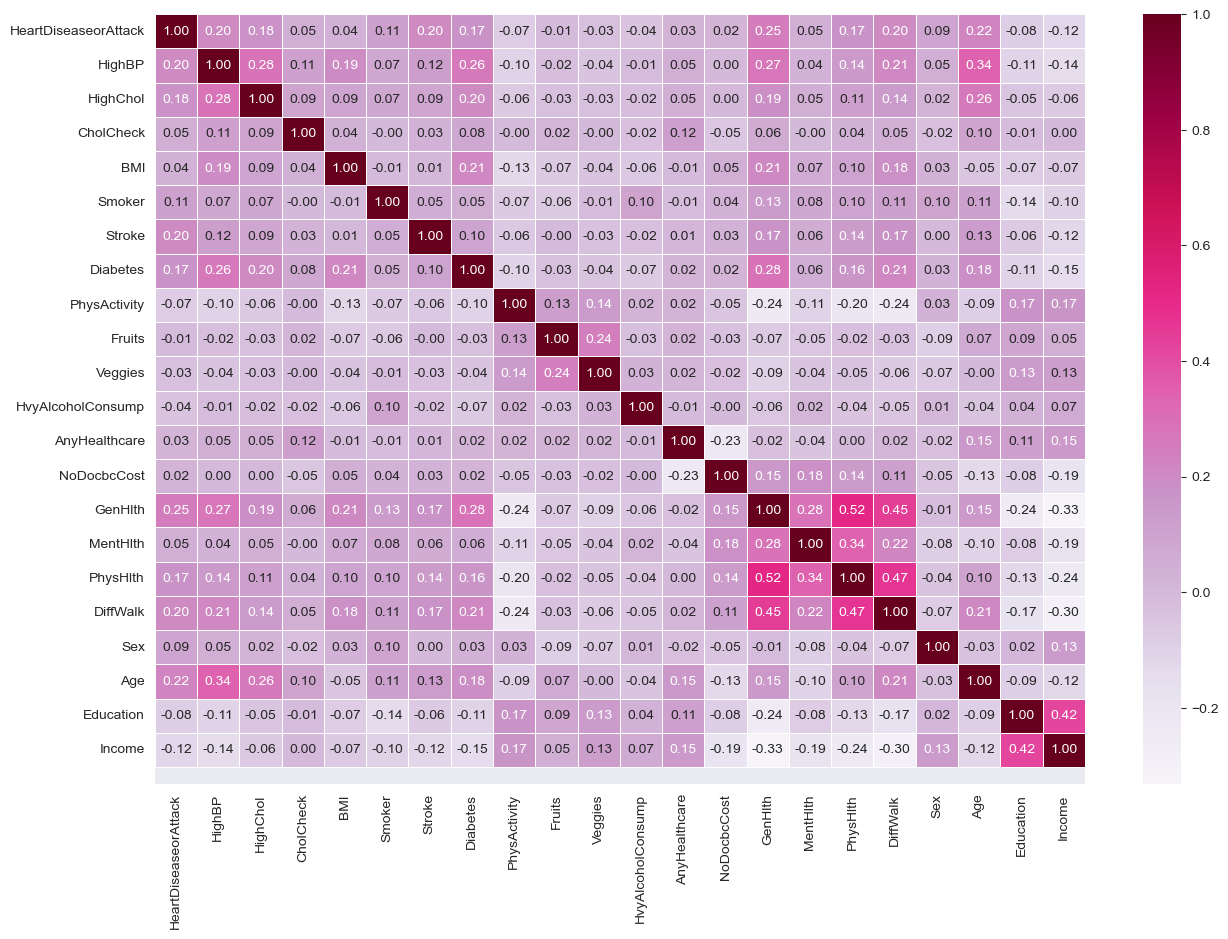

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='PuRd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)
plt.show()

As seen in the heatmap and to_drop list no highly correlated columns, so no dropping process.

In [20]:
to_drop = high_correlated_cols(df)
to_drop

[]

### Outlier Analysis

In [21]:
# Only these three columns and Age column are numerical.
num_cols = ['MentHlth', 'BMI', 'PhysHlth']

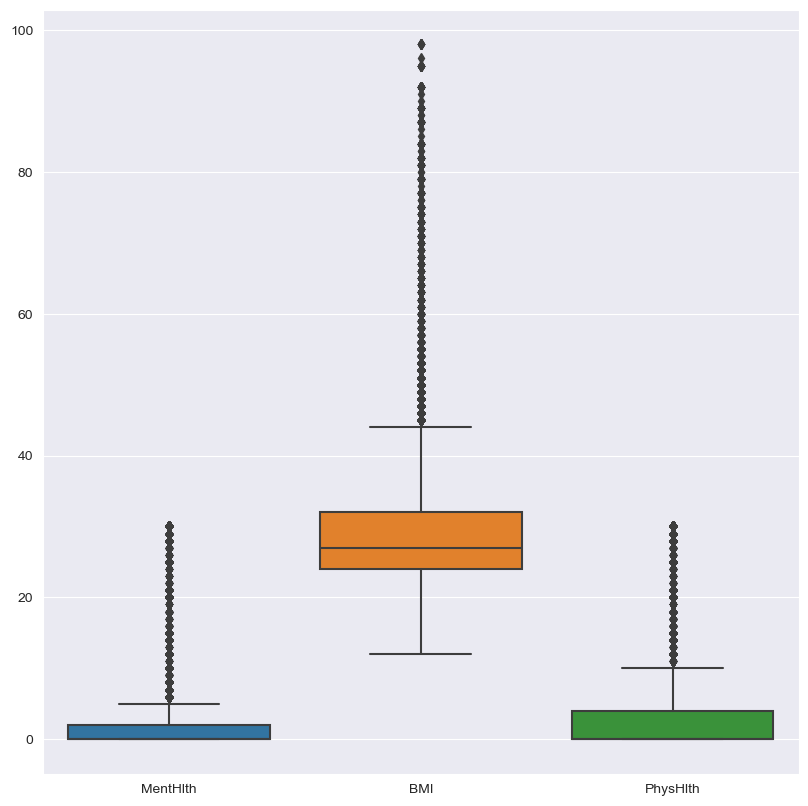

In [22]:
boxplot(df, num_cols)

As seen in the figures there are so many outliers in our dataset in the 'MentHlth', 'BMI', 'PhysHlth' columns but there is no outlier in the Age column.

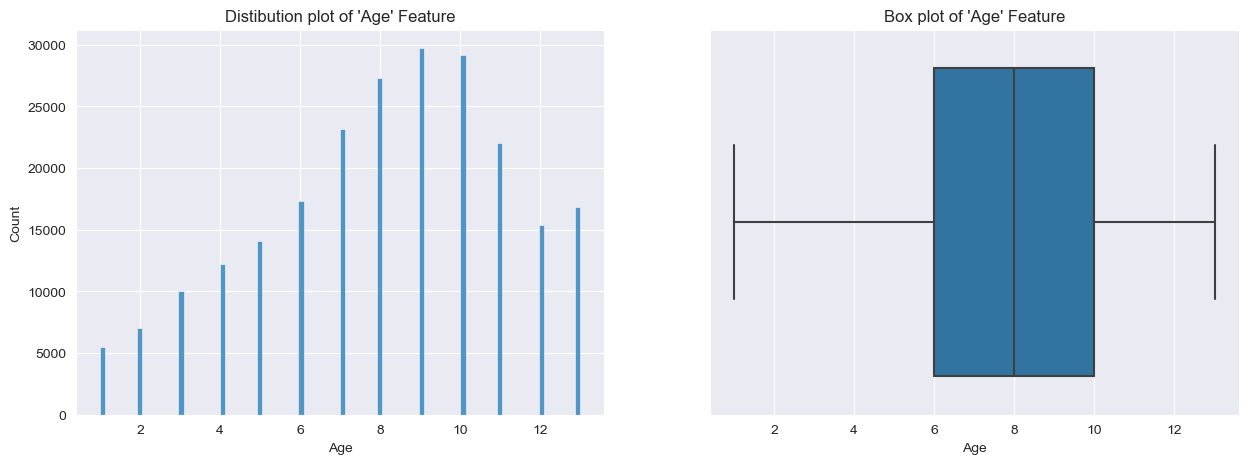

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df['Age'], ax=ax[0])
sns.boxplot(df['Age'], ax=ax[1])
ax[1].set_title("Box plot of 'Age' Feature")
ax[0].set_title("Distibution plot of 'Age' Feature")
plt.show()

Applied standard scaler to numerical features with creating a StandardScaler() and fitting to the data.

In [24]:
scaler = StandardScaler()
cols_to_scale = num_cols

scaler.fit(df[cols_to_scale])
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [25]:
df[cols_to_scale]

,MentHlth,BMI,PhysHlth
0,1.879074,1.667220,1.141300
1,-0.454434,-0.543101,-0.516791
2,3.434746,-0.101037,2.799391
3,-0.454434,-0.248391,-0.516791
4,-0.065516,-0.690456,-0.516791
...,...,...,...
253675,-0.454434,2.403993,0.035906
253676,-0.454434,-1.574584,-0.516791
253677,-0.454434,-0.101037,-0.516791
253678,-0.454434,-0.837810,-0.516791


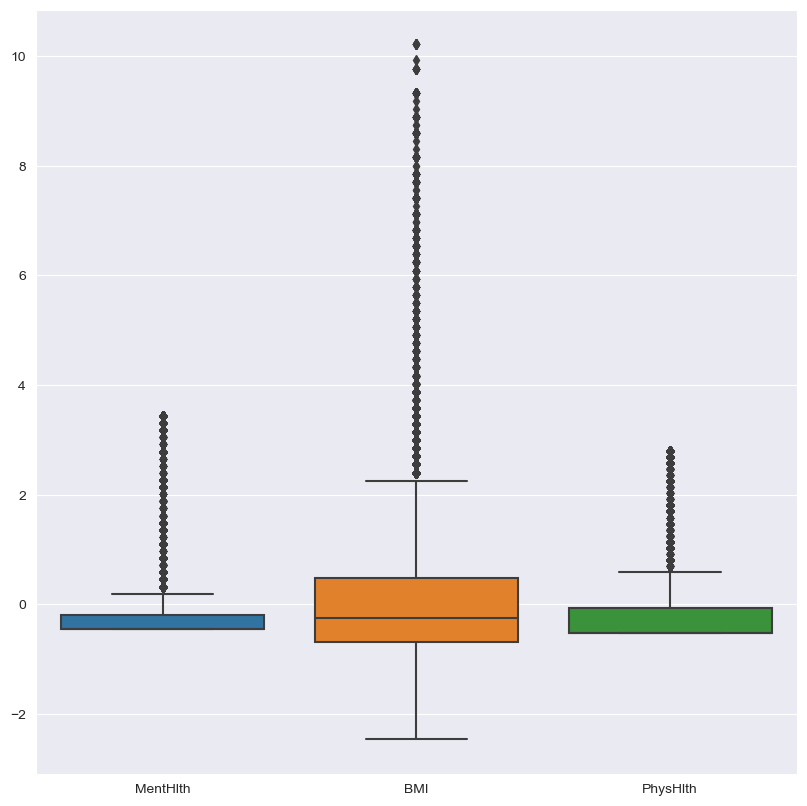

In [26]:
boxplot(df, num_cols)

Again checking which columns have outlier:

In [27]:
for col in num_cols:
    print(col,":",check_outlier(df,col))

MentHlth : True
BMI : True
PhysHlth : True


First, we tried to remove outliers but lots of data has been lost. So, we canceled from this idea.

In [28]:
for col in num_cols:
    df_without_outlier = remove_outlier(df, col)

In [29]:
df_without_outlier.shape

(195434, 22)

Then, we replace outliers with threshold values.

In [30]:
for col in num_cols:
    df = replace_with_thresholds(df, col, q1=0.25, q3=0.75)

In [31]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,1.667220,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.193763,0.588603,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,-0.543101,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,-0.454434,-0.516791,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,-0.101037,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,0.193763,0.588603,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,-0.248391,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,-0.454434,-0.516791,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,-0.690456,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,-0.065516,-0.516791,0.0,0.0,11.0,5.0,4.0


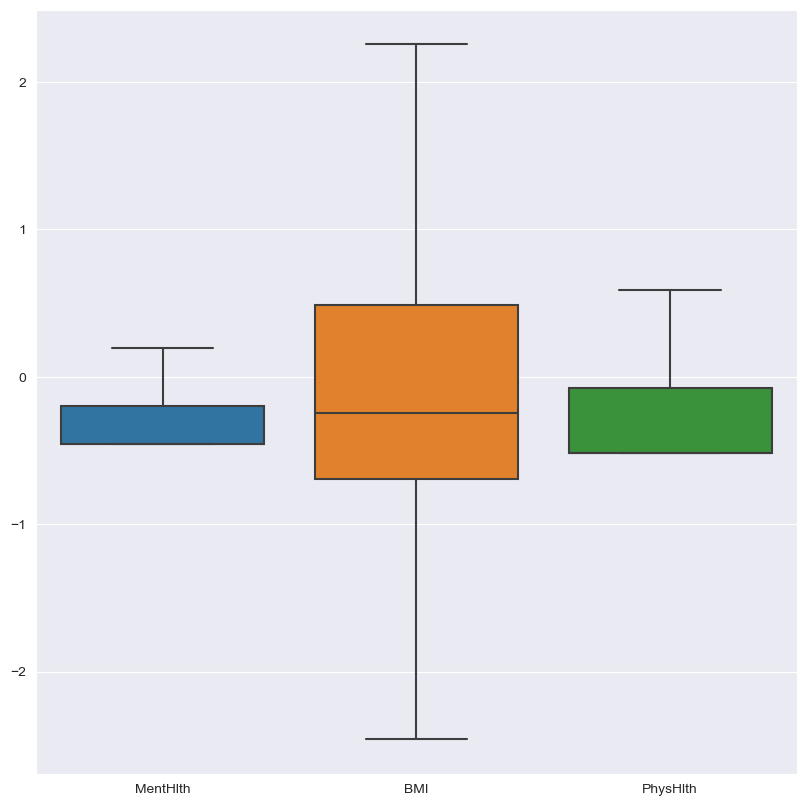

In [32]:
boxplot(df, num_cols)

As seen in the boxplots outliers has been handled.

###  Data Exploration

In this part, we explored the dataset with different visualization techniques.

In [33]:
# Although they appear to be of float64 type, these columns are of categorical type.
cat_col = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

We examined the distribution of categorical columns with help of the count plot.

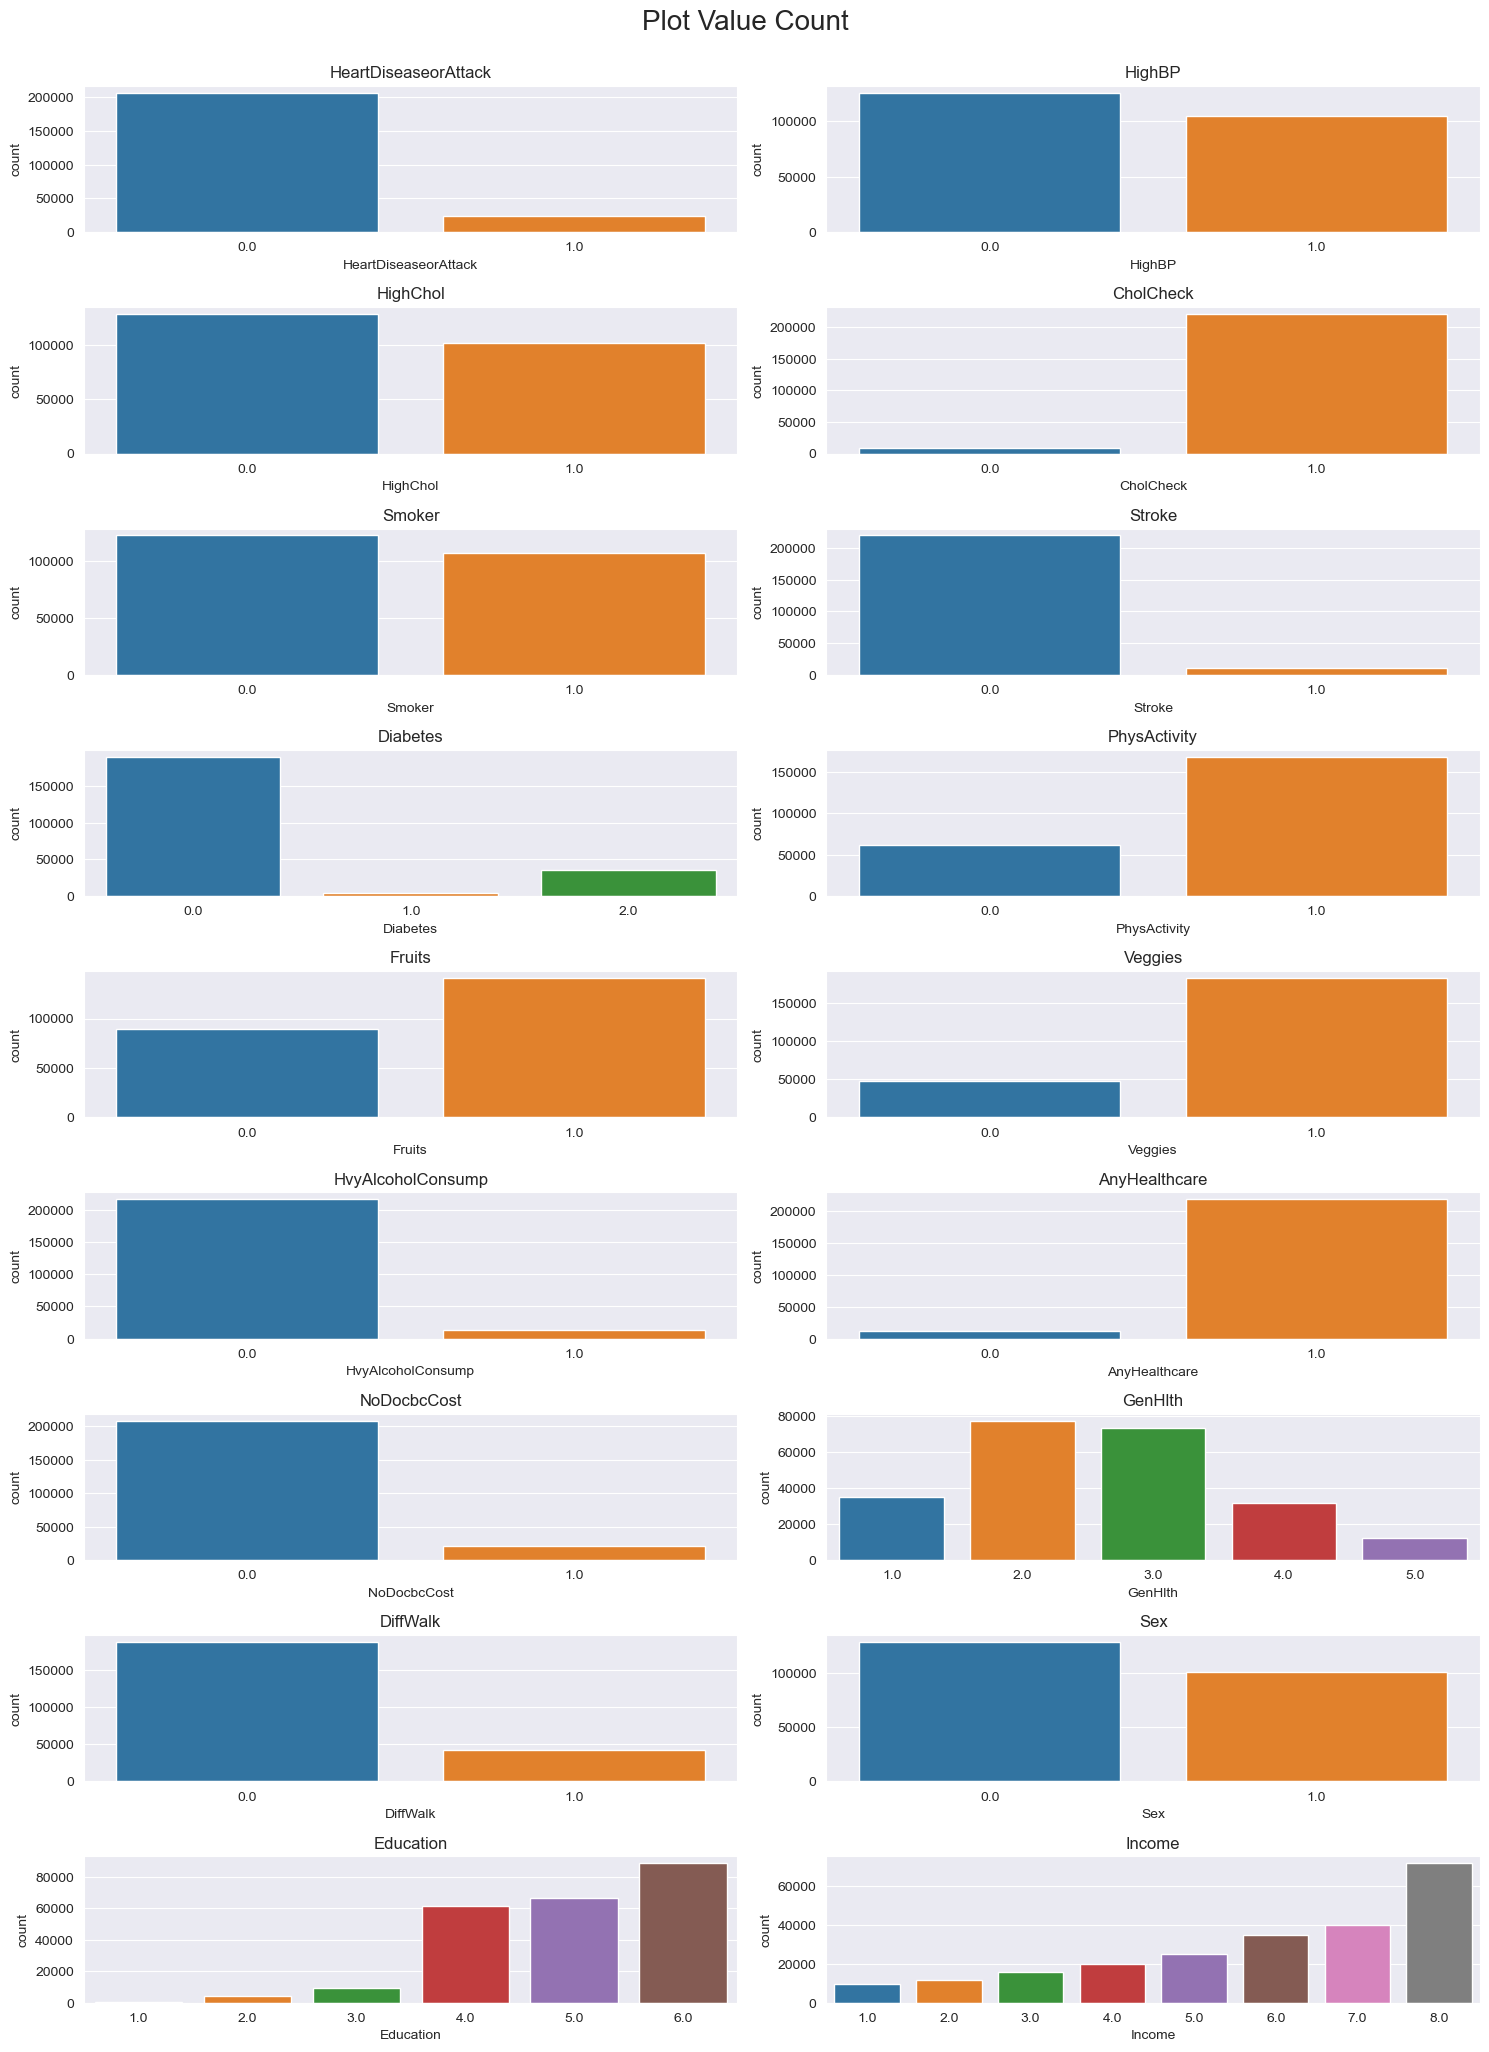

In [34]:
plt.figure(figsize=(15,40))
for i,column in enumerate(cat_col):
    plt.subplot(len(cat_col), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

As we said in the beginning, there is an imbalance situation in the dataset.

In [35]:
df['HeartDiseaseorAttack'].value_counts()

0.0    206064
1.0     23717
Name: HeartDiseaseorAttack, dtype: int64

We also examined the distribtion of the numerical columns with the help of hist plots.

<AxesSubplot:xlabel='Age', ylabel='Count'>

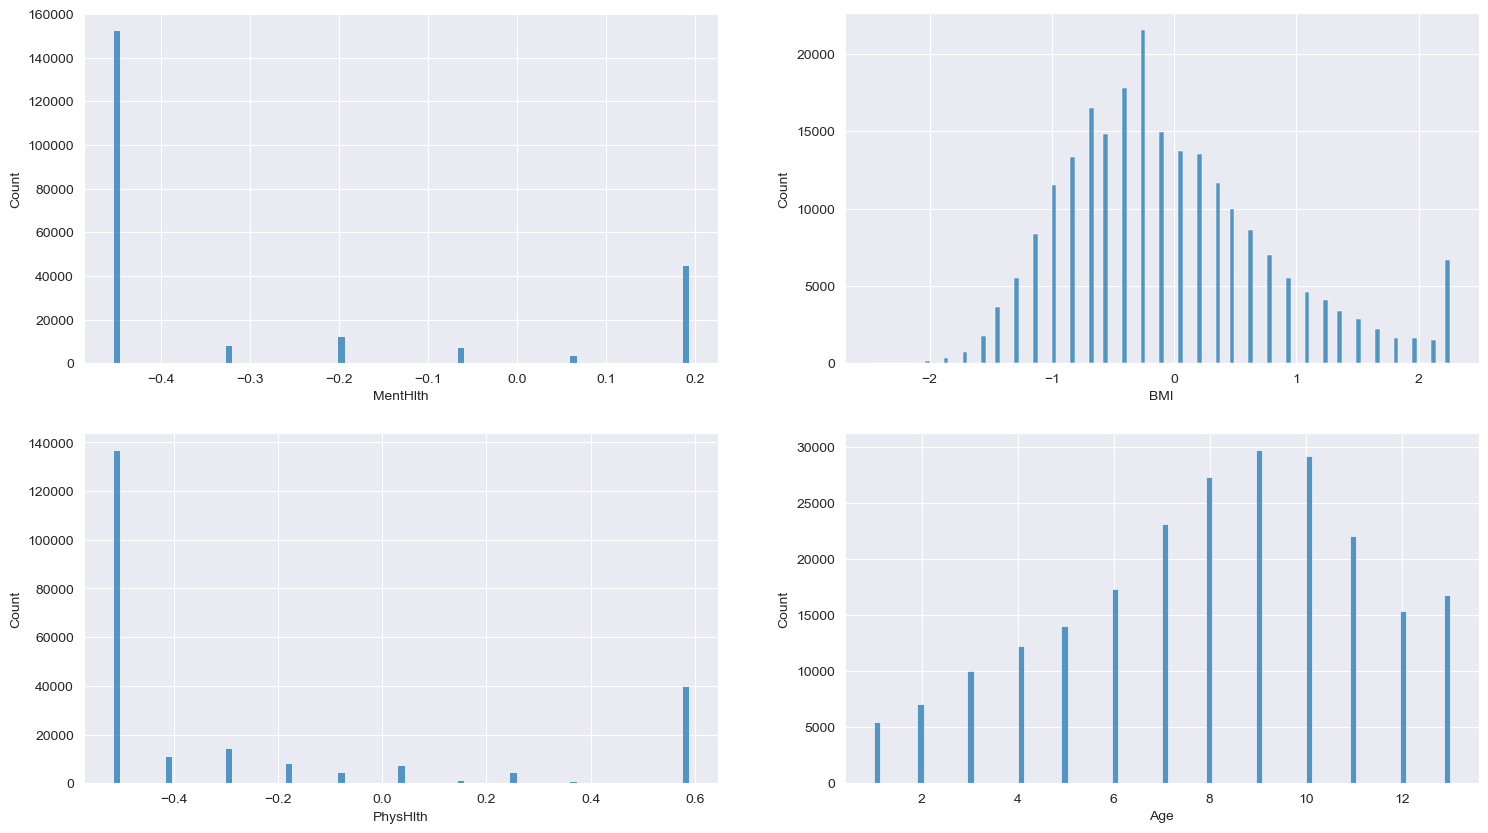

In [36]:
numeric_cols = ['MentHlth', 'BMI', 'PhysHlth','Age']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=numeric_cols[0])
sns.histplot(ax=axes[0,1], data=df, x=numeric_cols[1])
sns.histplot(ax=axes[1,0], data=df, x=numeric_cols[2])
sns.histplot(ax=axes[1,1], data=df, x=numeric_cols[3])

We observed the distributions of catgorical columns according to HeartDiseaseorAttack feature.

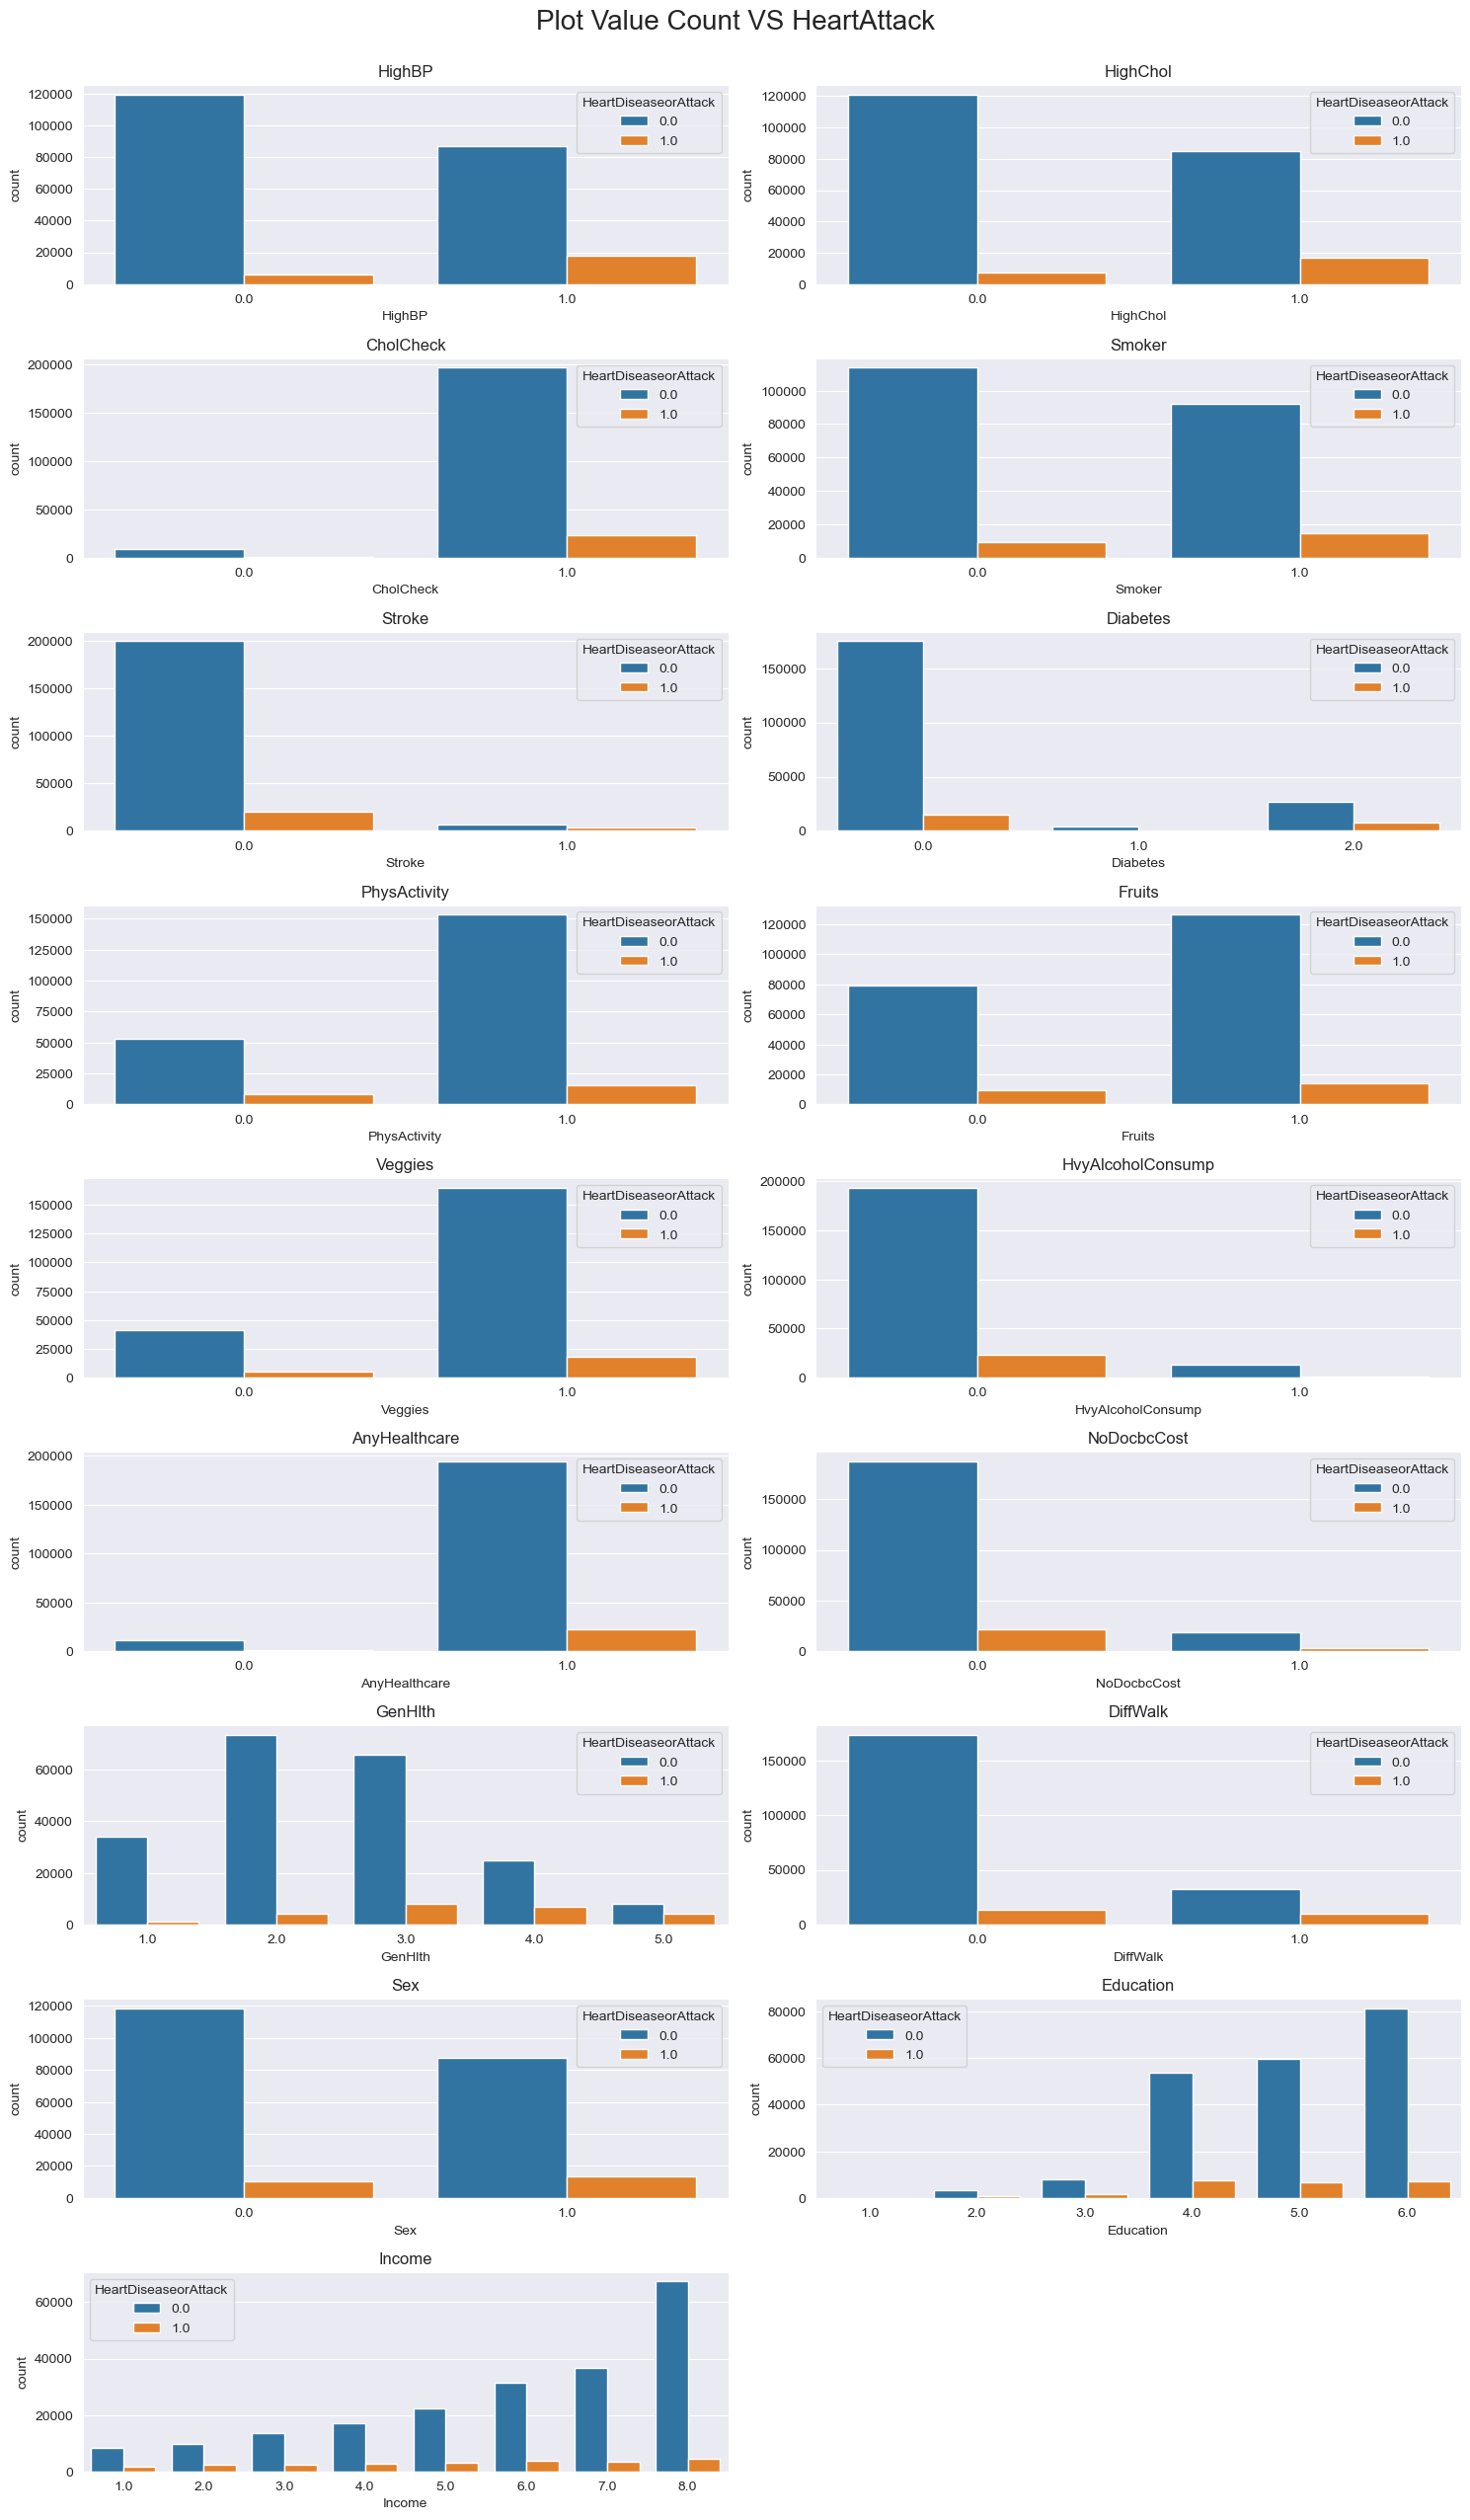

In [37]:
plt.figure(figsize=(15,50))
for i,column in enumerate(cat_col[1:]):
    plt.subplot(len(cat_col), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

### Feature Engineering

We start the feature engineering process with observing the pairplots of numerical columns according to the HeartDiseaseorAttack class.

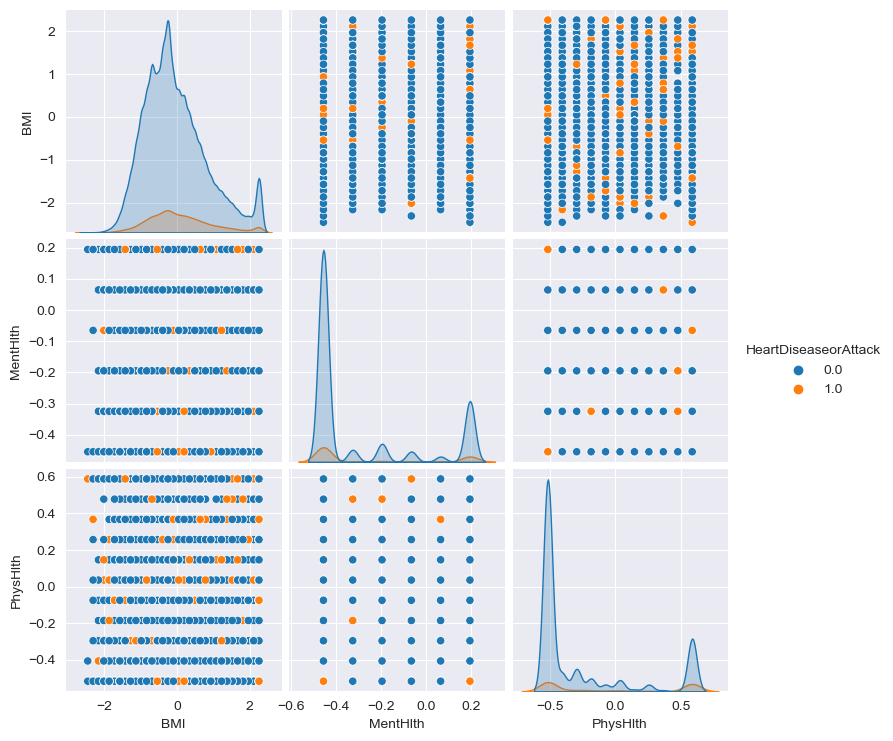

In [136]:
sns.pairplot(data=df[numeric_cols], hue = 'HeartDiseaseorAttack')

We created X and Y, then we splitted them with using train_test_split.

In [38]:
X = df.drop(columns='HeartDiseaseorAttack',axis = 1)
Y = df['HeartDiseaseorAttack']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

These are algorithms that we used to train and test our data. We will choose one of these algorithms according to the performance of models. All of these algorithms appropriate to binary categorical classification problems.

In [40]:
algorithms = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]
algorithm_names = ['LogisticRegression',
    'KNeighborsClassifier',
    'RandomForestClassifier',
    'XGBClassifier',
    'AdaBoostClassifier',
    'GradientBoostingClassifier']

In [41]:
results_df = model_results(algorithms, algorithm_names, X_train, y_train,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 90.0537%
Log Loss: 3.435322399581455


KNeighborsClassifier
***Results***
Accuracy: 88.7873%
Log Loss: 3.8727333619188995


RandomForestClassifier
***Results***
Accuracy: 89.3879%
Log Loss: 3.665299845284493


XGBClassifier
***Results***
Accuracy: 90.0385%
Log Loss: 3.4405829570765687


AdaBoostClassifier
***Results***
Accuracy: 89.9493%
Log Loss: 3.471398445099673


GradientBoostingClassifier
***Results***
Accuracy: 90.0973%
Log Loss: 3.420289871556144




In [42]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,90.053746,3.435322
1,KNeighborsClassifier,88.787345,3.872733
2,RandomForestClassifier,89.387906,3.665300
3,XGBClassifier,90.038514,3.440583
4,AdaBoostClassifier,89.949300,3.471398
5,GradientBoostingClassifier,90.097265,3.420290


The results here show the results in the data that we did not apply pca. PCA is a tool for identifying the major axes of variance in a dataset and allows easy data exploration to understand key variables in the data and detect outliers. When applied properly, it is one of the most powerful tools in the data analysis toolkit. For this reason, we apply pca to train data to observe the effect of pca application on the results.

In [43]:
pca = PCA()
pca = pca.fit_transform(X_train)
pca

array([[-3.01090272e+00,  3.69213834e-01, -6.08341132e-01, ...,
        -2.03395380e-02, -3.64186672e-02,  1.17780418e-02],
       [-3.19150617e-02,  1.33781905e+00, -1.71152324e+00, ...,
        -3.54687124e-01, -4.12952377e-02, -4.22884081e-03],
       [-4.58849844e+00, -2.17463633e+00, -9.50462249e-01, ...,
        -1.15768271e-02, -6.42558645e-02, -2.88667326e-02],
       ...,
       [-7.57323286e-01, -1.15741802e+00,  3.86582575e-01, ...,
        -5.64190977e-02, -4.35553097e-02, -2.98847777e-02],
       [-2.54925581e+00,  3.48528024e+00, -3.92788588e-01, ...,
         5.74917956e-02, -1.19837417e-01, -3.84868325e-02],
       [-2.34299241e+00, -2.80950261e+00, -6.81048568e-01, ...,
        -1.88350423e-02,  8.06820910e-03, -4.48129897e-02]])

### Clustering

In [44]:
#t-SNE algorithm
reduced_X_tSNE = TSNE(n_components=2, random_state=0).fit_transform(X.values)

The t-SNE algorithm can cluster the samples with very good accuracy, depending on whether they are heart disease or not.

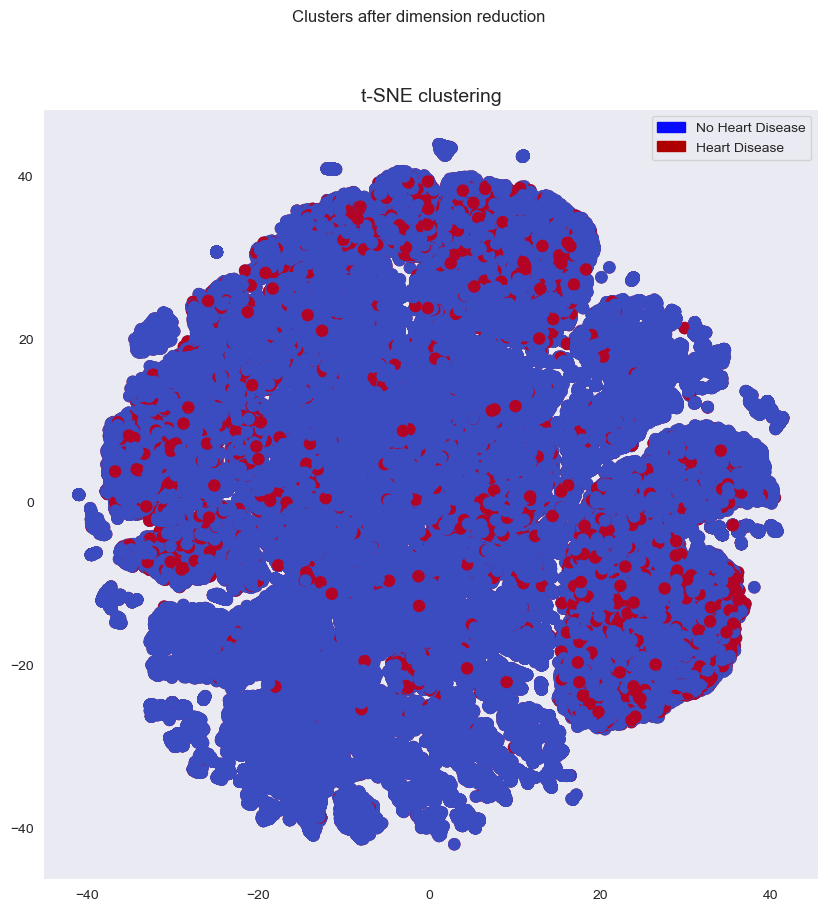

In [48]:
# Visualization after dimension reduction algorithm
f, (ax1) = plt.subplots(1, 1, figsize=(10,10))
f.suptitle("Clusters after dimension reduction")

#t-SNE scatter plot
ax1.scatter(reduced_X_tSNE[:,0], reduced_X_tSNE[:,1], c=(Y == 0), cmap="coolwarm", label="No Heart Disease", linewidths=3)
ax1.scatter(reduced_X_tSNE[:,0], reduced_X_tSNE[:,1], c=(Y == 1), cmap="coolwarm", label="Heart Disease", linewidths=3)
ax1.set_title("t-SNE clustering", fontsize=14)
ax1.grid(False)

blue_legend = mpatches.Patch(color="#0A0AFF", label="No Heart Disease")
red_legend = mpatches.Patch(color="#AF0000", label = "Heart Disease")
ax1.legend(handles=[blue_legend, red_legend])
plt.show()

The t-SNE algorithm can cluster the samples with very good accuracy, depending on whether they are heart disease or not. This algorithm is used to visualize high-dimensional data by making it low-dimensional without much data loss.

This image can allow us to make an inference about whether predictive models can work properly on our dataset.

## Predictive Modelling

### Under Sampling

<center><img src="https://dataaspirant.com/wp-content/uploads/2020/08/17-undersampling.png" title="Data Science Life Cycle" width="650"/></center>

Undersampling refers to a group of techniques designed to balance the class distribution for a classification dataset that has a skewed class distribution.

An imbalanced class distribution will have one or more classes with few examples (the minority classes) and one or more classes with many examples (the majority classes). It is best understood in the context of a binary (two-class) classification problem where class 0 is the majority class and class 1 is the minority class.

Undersampling techniques remove examples from the training dataset that belong to the majority class in order to better balance the class distribution, such as reducing the skew from a 1:100 to a 1:10, 1:2, or even a 1:1 class distribution. This is different from oversampling that involves adding examples to the minority class in an effort to reduce the skew in the class distribution.

*(from https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)*

#### Undersampling with sampling strategy 1.0 and PCA applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.5
1.0                     0.5
dtype: float64


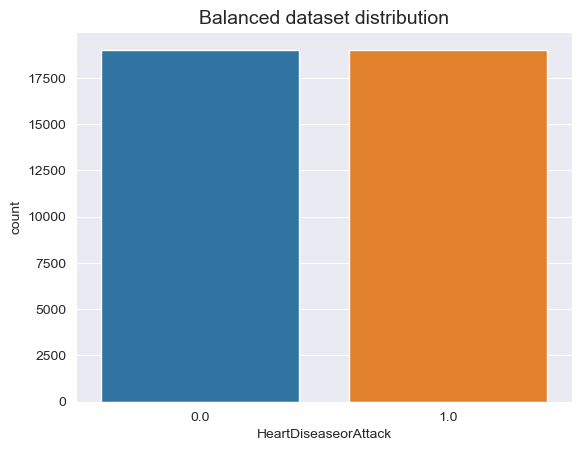

In [55]:
X_under, y_under = apply_under_sampling(pca,y_train)

Results obtained by performing random undersampling on PCA applied data (equal classes)

In [56]:
results_df = model_results(algorithms, algorithm_names, X_under, y_under, X_test, y_test)

LogisticRegression
***Results***
Accuracy: 73.9017%
Log Loss: 9.014182612098391


KNeighborsClassifier
***Results***
Accuracy: 81.9201%
Log Loss: 6.244662711195244


RandomForestClassifier
***Results***
Accuracy: 76.2300%
Log Loss: 8.210022145019336


XGBClassifier
***Results***
Accuracy: 31.3793%
Log Loss: 23.70127877571963


AdaBoostClassifier
***Results***
Accuracy: 30.3697%
Log Loss: 24.049989379061874


GradientBoostingClassifier
***Results***
Accuracy: 12.5835%
Log Loss: 30.193287140822832




In [57]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,73.901691,9.014183
1,KNeighborsClassifier,81.920056,6.244663
2,RandomForestClassifier,76.229954,8.210022
3,XGBClassifier,31.379333,23.701279
4,AdaBoostClassifier,30.369693,24.049989
5,GradientBoostingClassifier,12.583502,30.193287


Here we observe that Boosting algorithms give very low accuracy values. We observe that the accuracy values of other algorithms also decrease. In other words, we observe that we have lost a lot of data necessary for correct classification, and therefore algorithms cannot classify correctly.

Then we changed the sampling strategy as 0.2, auto was 1 we tried above.

#### Undersampling with sampling strategy 0.2 and PCA applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.833333
1.0                     0.166667
dtype: float64


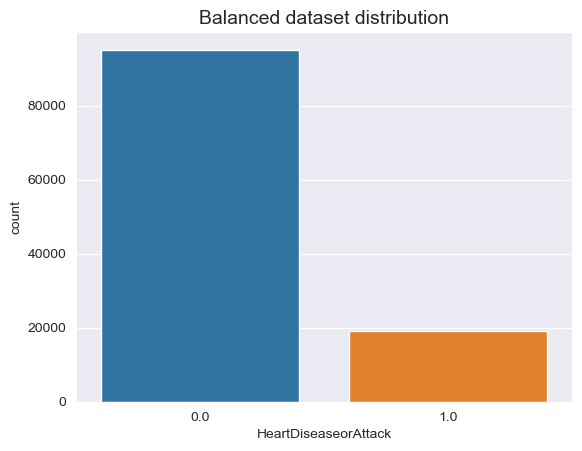

In [58]:
X_under, y_under = apply_under_sampling(pca,y_train,0.2)

In [59]:
results_df = model_results(algorithms, algorithm_names, X_under, y_under,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 87.9496%
Log Loss: 4.162075576964581


KNeighborsClassifier
***Results***
Accuracy: 89.6294%
Log Loss: 3.5818672816922565


RandomForestClassifier
***Results***
Accuracy: 88.7068%
Log Loss: 3.900534960279032


XGBClassifier
***Results***
Accuracy: 48.9414%
Log Loss: 17.635396446300927


AdaBoostClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642


GradientBoostingClassifier
***Results***
Accuracy: 89.7970%
Log Loss: 3.5239968517382256




In [60]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,87.949605,4.162076
1,KNeighborsClassifier,89.629436,3.581867
2,RandomForestClassifier,88.706835,3.900535
3,XGBClassifier,48.941402,17.635396
4,AdaBoostClassifier,89.799160,3.523245
5,GradientBoostingClassifier,89.796984,3.523997


After we have changed sampling strategy, the accuracies are increased. However, again, it is seen that the accuracy value of XGBoost Classifier is very low and the log loss value is very high. Now we try 0.5 to choose between 0.5-0.2.

#### Undersampling with sampling strategy 0.5 and PCA applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.666667
1.0                     0.333333
dtype: float64


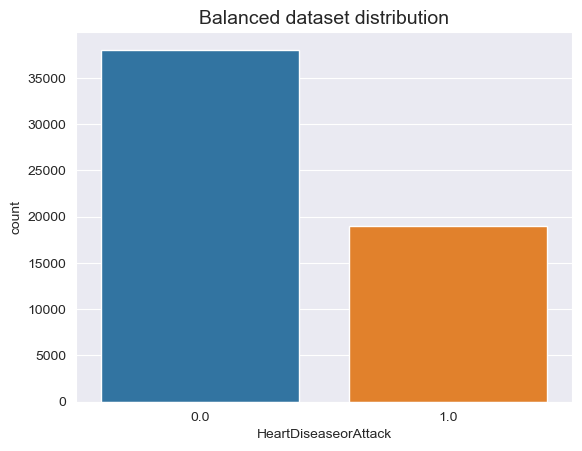

In [98]:
X_under, y_under = apply_under_sampling(pca,y_train,0.5)

In [62]:
results_df = model_results(algorithms, algorithm_names, X_under, y_under,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 83.5303%
Log Loss: 5.6885050375401915


KNeighborsClassifier
***Results***
Accuracy: 88.3239%
Log Loss: 4.032807037305252


RandomForestClassifier
***Results***
Accuracy: 63.2548%
Log Loss: 12.691601660907144


XGBClassifier
***Results***
Accuracy: 45.6971%
Log Loss: 18.755985022851927


AdaBoostClassifier
***Results***
Accuracy: 85.8128%
Log Loss: 4.900122206420944


GradientBoostingClassifier
***Results***
Accuracy: 37.3697%
Log Loss: 21.63221977360947




In [63]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,83.530257,5.688505
1,KNeighborsClassifier,88.323868,4.032807
2,RandomForestClassifier,63.254782,12.691602
3,XGBClassifier,45.697065,18.755985
4,AdaBoostClassifier,85.812825,4.900122
5,GradientBoostingClassifier,37.369715,21.632220


As seen above, 0.5 has decreased the accuracies, so we decided to choose 0.2 with under_sampling pca applied data.
Now, we will use x_train (not applied pca), y_train  to see the effect of pca to our data.

#### Undersampling with sampling strategy 0.2 and PCA not applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.833333
1.0                     0.166667
dtype: float64


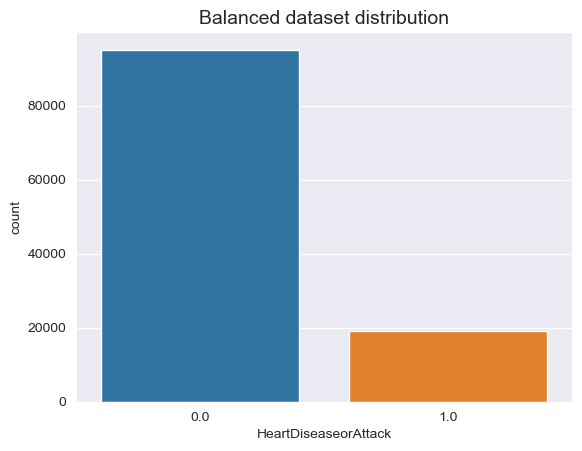

In [64]:
X_under, y_under = apply_under_sampling(X_train,y_train,0.2)

In [65]:
results_df = model_results(algorithms, algorithm_names, X_under, y_under,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 89.3792%
Log Loss: 3.6683180150564336


KNeighborsClassifier
***Results***
Accuracy: 87.1880%
Log Loss: 4.425142390272561


RandomForestClassifier
***Results***
Accuracy: 88.4479%
Log Loss: 3.9899872997414194


XGBClassifier
***Results***
Accuracy: 89.1812%
Log Loss: 3.736711978436245


AdaBoostClassifier
***Results***
Accuracy: 89.2595%
Log Loss: 3.709655592403513


GradientBoostingClassifier
***Results***
Accuracy: 89.3596%
Log Loss: 3.675083403426774




In [66]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,89.379202,3.668318
1,KNeighborsClassifier,87.188024,4.425142
2,RandomForestClassifier,88.447897,3.989987
3,XGBClassifier,89.181191,3.736712
4,AdaBoostClassifier,89.259525,3.709656
5,GradientBoostingClassifier,89.359619,3.675083


As we see above, the accuracies are all increased when we used raw split data instead of pca. So, we decided to use raw splitted data instead of pca. Now we are trying oversampling to see effect over-under sampling.

### Oversampling

<center><img src="https://dataaspirant.com/wp-content/uploads/2020/08/10-oversampling.png" title="Data Science Life Cycle" width="650"/></center>

Over sampling is a methods duplicate or create new synthetic examples in the minority class. Over sampling is used when the amount of data collected is insufficient. A popular over sampling technique is SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic samples by randomly sampling the characteristics from occurrences in the minority class.

Here we are starting applying "over sampling" method. As we did in undersampling, we are starting with using pca applied data.

#### Oversampling with sampling strategy 1.0 and PCA not applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.5
1.0                     0.5
dtype: float64


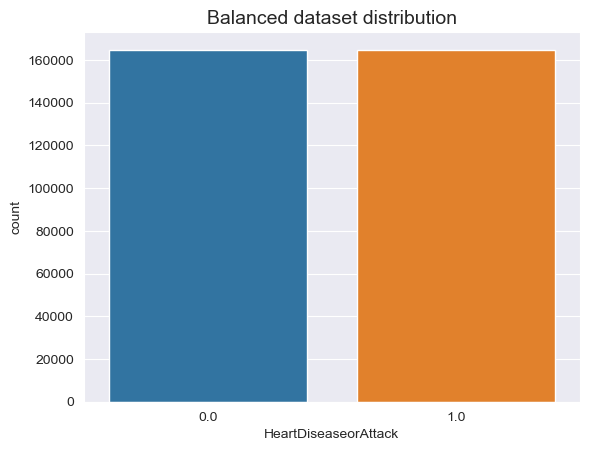

In [99]:
X_over, y_over = apply_over_sampling(pca,y_train)

In [100]:
results_df = model_results(algorithms, algorithm_names, X_over, y_over,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 88.9875%
Log Loss: 3.8035785620740734


KNeighborsClassifier
***Results***
Accuracy: 88.9092%
Log Loss: 3.8306351916902432


RandomForestClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642


XGBClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642


AdaBoostClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642


GradientBoostingClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642




In [101]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,88.987532,3.803579
1,KNeighborsClassifier,88.909198,3.830635
2,RandomForestClassifier,89.799160,3.523245
3,XGBClassifier,89.799160,3.523245
4,AdaBoostClassifier,89.799160,3.523245
5,GradientBoostingClassifier,89.799160,3.523245


It is seen that oversampling application gives better results than undersampling application. But we will try different values to find the optimal value for sampling strategy.

#### Oversampling with sampling strategy 0.2 and PCA applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.833333
1.0                     0.166667
dtype: float64


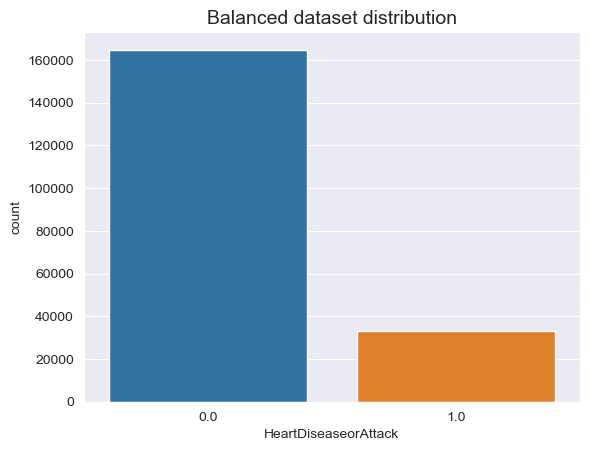

In [67]:
X_over, y_over = apply_over_sampling(pca,y_train,0.2)

In [68]:
results_df = model_results(algorithms, algorithm_names, X_over, y_over,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 89.5337%
Log Loss: 3.614936101294391


KNeighborsClassifier
***Results***
Accuracy: 89.7448%
Log Loss: 3.5420343786310524


RandomForestClassifier
***Results***
Accuracy: 89.8209%
Log Loss: 3.5157302688453975


XGBClassifier
***Results***
Accuracy: 89.7230%
Log Loss: 3.549550581747848


AdaBoostClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642


GradientBoostingClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642




In [69]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,89.533695,3.614936
1,KNeighborsClassifier,89.744761,3.542034
2,RandomForestClassifier,89.820920,3.515730
3,XGBClassifier,89.723002,3.549551
4,AdaBoostClassifier,89.799160,3.523245
5,GradientBoostingClassifier,89.799160,3.523245


The accuracy scores of 0.2-over_sampling pca has came very good, now we will try 0.5 for sampling strategy.

#### Oversampling with sampling strategy 0.5 and PCA applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.666668
1.0                     0.333332
dtype: float64


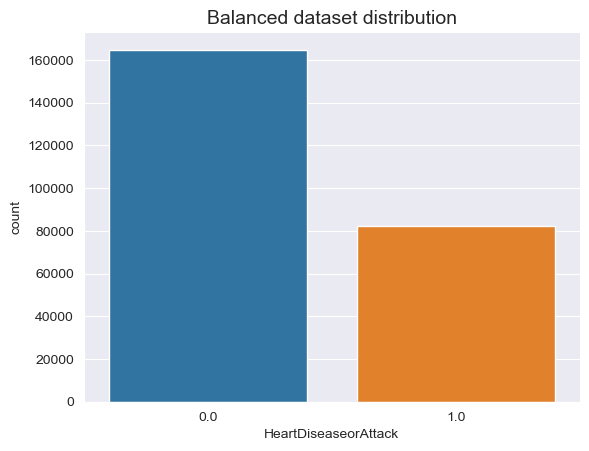

In [70]:
X_over, y_over = apply_over_sampling(pca,y_train,0.5)

In [71]:
results_df = model_results(algorithms, algorithm_names, X_over, y_over,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 89.3183%
Log Loss: 3.689340827957179


KNeighborsClassifier
***Results***
Accuracy: 89.1703%
Log Loss: 3.740447574624929


RandomForestClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642


XGBClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642


AdaBoostClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642


GradientBoostingClassifier
***Results***
Accuracy: 89.7992%
Log Loss: 3.523245288842642




In [72]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,89.318276,3.689341
1,KNeighborsClassifier,89.170311,3.740448
2,RandomForestClassifier,89.799160,3.523245
3,XGBClassifier,89.799160,3.523245
4,AdaBoostClassifier,89.799160,3.523245
5,GradientBoostingClassifier,89.799160,3.523245


In the over_sampling method 0.5 came a slightly better than 0.2. However, we want to see the accuracy values for different oversampling methods with not applied pca data.

#### Oversampling with sampling strategy 1.0 and PCA not applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.5
1.0                     0.5
dtype: float64


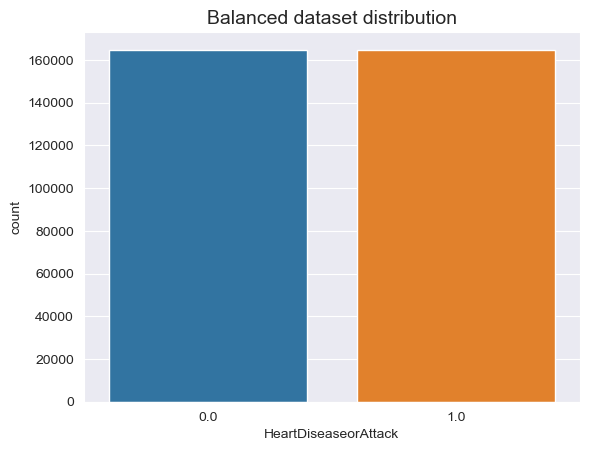

In [73]:
X_over, y_over = apply_over_sampling(X_train,y_train)

In [74]:
results_df = model_results(algorithms, algorithm_names, X_over, y_over,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 74.3565%
Log Loss: 8.857150577488033


KNeighborsClassifier
***Results***
Accuracy: 74.6654%
Log Loss: 8.75041404870773


RandomForestClassifier
***Results***
Accuracy: 88.4196%
Log Loss: 3.9997510754288377


XGBClassifier
***Results***
Accuracy: 90.0646%
Log Loss: 3.4315643067224646


AdaBoostClassifier
***Results***
Accuracy: 81.6611%
Log Loss: 6.334138434667601


GradientBoostingClassifier
***Results***
Accuracy: 84.9294%
Log Loss: 5.205282387884106




In [75]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,74.356464,8.857151
1,KNeighborsClassifier,74.665448,8.750414
2,RandomForestClassifier,88.419610,3.999751
3,XGBClassifier,90.064626,3.431564
4,AdaBoostClassifier,81.661118,6.334138
5,GradientBoostingClassifier,84.929391,5.205282


In oversampling with sampling strategy 1, pca scores fared better from raw split data, unlike in undersampling.

#### Oversampling with sampling strategy 0.2 and PCA not applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.833333
1.0                     0.166667
dtype: float64


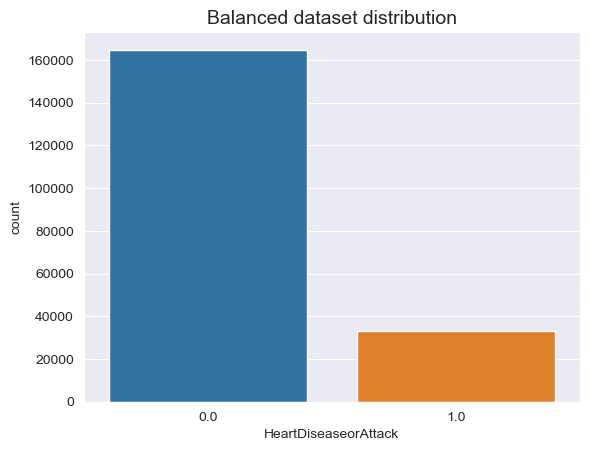

In [76]:
X_over, y_over = apply_over_sampling(X_train,y_train,0.2)

In [77]:
results_df = model_results(algorithms, algorithm_names, X_over, y_over,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 89.3161%
Log Loss: 3.690114069778672


KNeighborsClassifier
***Results***
Accuracy: 85.5017%
Log Loss: 5.0076078796612755


RandomForestClassifier
***Results***
Accuracy: 89.2030%
Log Loss: 3.72918467487424


XGBClassifier
***Results***
Accuracy: 90.0385%
Log Loss: 3.440582539504961


AdaBoostClassifier
***Results***
Accuracy: 89.5250%
Log Loss: 3.6179609000155857


GradientBoostingClassifier
***Results***
Accuracy: 89.9841%
Log Loss: 3.459373751949038




In [78]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,89.316100,3.690114
1,KNeighborsClassifier,85.501665,5.007608
2,RandomForestClassifier,89.202951,3.729185
3,XGBClassifier,90.038514,3.440583
4,AdaBoostClassifier,89.524991,3.617961
5,GradientBoostingClassifier,89.984116,3.459374


But, we took the highest accuracy with XGBoost Classifier here with raw splitted data on oversampling. It is slightly better than pca for sampling strategy as 0.2

#### Oversampling with sampling strategy 0.5 and PCA not applied data

Distribution of the classes in the subsample dataset
HeartDiseaseorAttack
0.0                     0.666668
1.0                     0.333332
dtype: float64


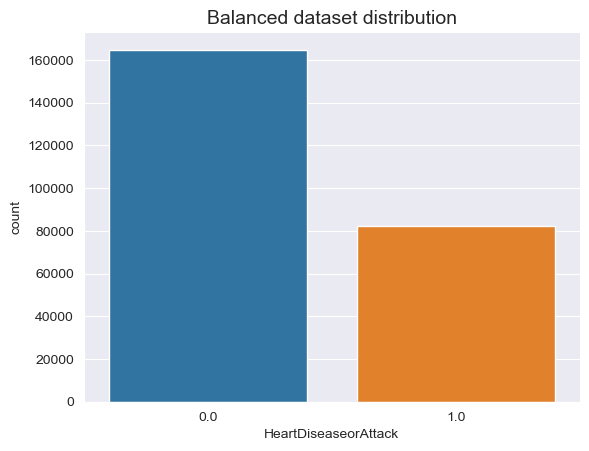

In [79]:
X_over, y_over = apply_over_sampling(X_train,y_train,0.5)

In [80]:
results_df = model_results(algorithms, algorithm_names, X_over, y_over,X_test,y_test)

LogisticRegression
***Results***
Accuracy: 83.5651%
Log Loss: 5.676519909299283


KNeighborsClassifier
***Results***
Accuracy: 78.6257%
Log Loss: 7.382562306039886


RandomForestClassifier
***Results***
Accuracy: 88.8461%
Log Loss: 3.8524436865665956


XGBClassifier
***Results***
Accuracy: 90.0189%
Log Loss: 3.4473468491486523


AdaBoostClassifier
***Results***
Accuracy: 86.3307%
Log Loss: 4.721271672614492


GradientBoostingClassifier
***Results***
Accuracy: 88.8200%
Log Loss: 3.861473332973006




In [81]:
results_df

,Algorithm Names,Accuracy Score,Log Score
0,LogisticRegression,83.565072,5.676520
1,KNeighborsClassifier,78.625672,7.382562
2,RandomForestClassifier,88.846095,3.852444
3,XGBClassifier,90.018931,3.447347
4,AdaBoostClassifier,86.330700,4.721272
5,GradientBoostingClassifier,88.819984,3.861473


Also, 0.2 score of sampling strategy give better accury value for XGBoost Classifier, than 0.5. So, we finally decided to use raw-split data with 0.2 and XGBoost as our main classifier. Now we will pass to hyperparameter tunning step to find best parameters of XGBoost, and we will finally use XGBoost with these parameters.

# Hyperparameter Tuning

In [103]:
parameters = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [104]:
grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [105]:
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print(end-start)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
3437.924596309662


In [106]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [124]:
final_xgb_model = XGBClassifier(**grid_search.best_params_).fit(X_train,y_train)

In [125]:
final_predictions = final_xgb_model.predict(X_test)

After this final model, we took our best accuracy on data. We observed we used correct classifier and parameters.

In [126]:
accuracy_score(y_test,final_predictions)*100

90.1581913527863

### Visualization of Models

In this step, we decided to show confusion matrix to see tp-fp-tn-fn values and precision-recall
Also, we showed AUC score. AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [130]:
print('Best AUC Score: {}'.format(grid_search.best_score_))
print('Accuracy: {}'.format(accuracy_score(y_test, final_predictions)))
print(confusion_matrix(y_test,final_predictions))

Best AUC Score: 0.8388942181003906
Accuracy: 0.901581913527863
[[40913   356]
 [ 4167   521]]


In [131]:
model_confusion_matrix = confusion_matrix(y_test,final_predictions)

In [132]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = model_confusion_matrix, display_labels = [False, True])

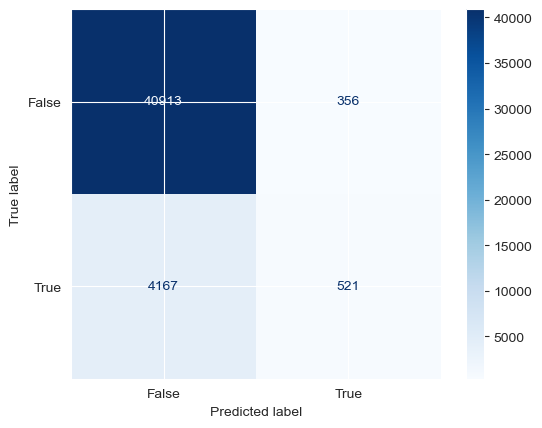

In [133]:
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

Here is our ROC curve tpr-fpr graph. A ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

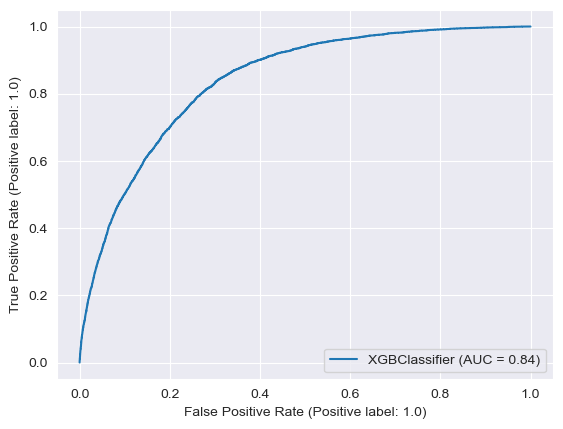

In [134]:
svc_disp = RocCurveDisplay.from_estimator(final_xgb_model, X_test, y_test)
plt.show()

 In ROC curve, classifiers that give curves closer to the top-left corner indicate a better performance. Our classifier's curve not perfect but good enough.

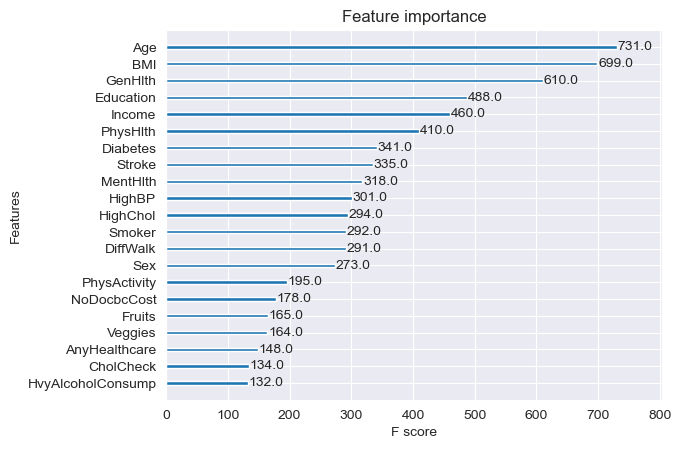

In [135]:
plot_importance(final_xgb_model)
pyplot.show()

When we plotted the importance's of features we can easily observed that 'Age' has the highest importance in the model. This is to be expected for the Heart Disease condition.

Here, we plotted precision-recall graph. The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

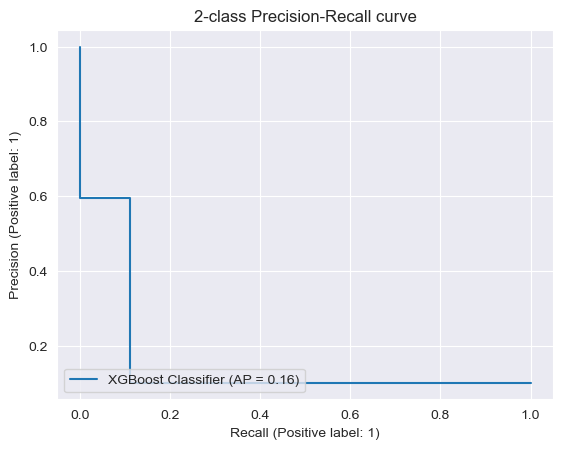

In [136]:
display = PrecisionRecallDisplay.from_predictions(y_test, final_predictions, name="XGBoost Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

Lastly, we decided to show precision-recall curve with different way.

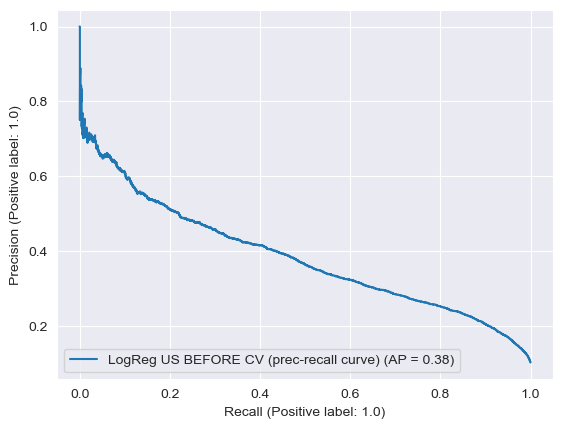

In [137]:
plot_precision_recall_curve(final_xgb_model, X_test, y_test, name = 'LogReg US BEFORE CV (prec-recall curve)')

# Conclusion

We expected to complete the Data Science lifecycle for the particular dataset we have chosen for this project. For this, we started the project
by examining the Health themed datasets, which is the theme of this year. We have choose the Heart Disease Health Indicators Dataset, which has
the desired features among the datasets. The last column in the dataset containing 253680 entries and 22 different columns is the output column.
In other words, the supervised learning method was studied throughout this project. Then, we started to prepare our data for the predictive
modelling phase by switching to data cleaning and preprocessing processes. In the feature engineering phase, we completed what we needed to do
before sending the data to the models. At this stage, steps such as PCA application and determination of the models to be used were carried out.
During this whole process, visualization techniques were used to better understand both the applied steps and the dataset, and the visualized
data interpreted. During the predictive modelling phase, we focused on solving the imbalance data problem, which is the biggest challenge for
this project. At this stage, we adopted four different approaches:

Applying oversampling to PCA-applied data
Applying undersampling to PCA-applied data
Oversampling to non-PCA data
Applying undersampling to non-PCA data

In each of these approaches, we tried to find the most optimal solution by trying different strategies in the models we created with six
different algorithms (‘LogisticRegression’, ‘KNeighborsClassifier’, ‘RandomForestClassifier’, 'XGBClassifier’, ‘AdaBoostClassifier’,
‘GradientBoostingClassifier’) that we chose considering that they were suitable for our problem. We interpreted our observations by comparing
the results of our trials with the others. Finally, we observed and reached the most optimal solution when we applied the oversampling with the
sampling_strategy parameter value of 0.2 using the data without applying PCA. The model that gave us this optimal result was the model we
created using the XGBoost algorithm. In the Hyperparameter Tuning stage, we aimed to find the most optimal model for using with the XGBoost
algorithm. For this, we used GridSearchCV is technique of finding the optimal parameter values from a given set of parameters in a grid. That
was the most time-consuming part of the project. We chose value of 10 for the K-fold, resulting in a total of 540 feet for 54 differents
combinations. This process took a total of 3437.92 seconds. But in the end, we got an accuracy value of 90.16% with optimal parameters.

In this project, we learned which approach we should have taken when faced with an imbalanced data situation. Data preprocessing and feature
engineering steps are for predictive modelling, and understand how important it is to interpret the dataset and the operations performed with
visualization techniques.